### JT - 1/16/25 - Intensive Data Science 2
# Q2 Project: Data Exploration of Crime in American Communities
## https://www.kaggle.com/datasets/michaelbryantds/crimedata
The dataset used contains information on 2215 different communities, including demographic information, such as racial composition, income, and homelessness, as well as crime data. The crime data includes numbers of each type of crime, such as murder, arson, and rape, as well as crime per 100,000 people given as 'CrimePerPop'. 
## Table of Contents:
1) [Three Scatter Plots Relating Violent Crime, Income, and Immigration](#1)
2) [Scatter Plot Relating Violent Crime to Urban Population](#2)
3) [Choropleth Map Depicting the Average Violent Crime Per Pop in Each State](#3)

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('crime data - Sheet1.csv')

In [3]:
df = df.dropna(subset=['medIncome', 'ViolentCrimesPerPop'])
df

,communityName,state,countyCode,communityCode,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,11980,3.10,1.37,91.78,6.50,1.88,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,23123,2.82,0.80,95.57,3.44,0.85,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,29344,2.43,0.74,94.33,3.43,2.35,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,16656,2.40,1.70,97.35,0.50,0.70,...,225.0,1301.78,716.0,4142.56,47.0,271.93,NaN,NaN,306.64,NaN
5,Springfieldcity,MO,NaN,NaN,140494,2.45,2.51,95.65,0.90,0.95,...,2094.0,1386.46,7690.0,5091.64,454.0,300.60,134.0,88.72,442.95,6867.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Mercedcity,CA,NaN,NaN,56216,3.07,6.87,61.68,15.23,29.86,...,1376.0,2268.72,2563.0,4225.82,489.0,806.25,34.0,56.06,545.75,7356.84
2211,Pinevillecity,LA,NaN,NaN,12251,2.68,21.18,76.65,1.52,1.29,...,104.0,860.43,574.0,4748.90,24.0,198.56,2.0,16.55,124.10,5824.44
2212,Yucaipacity,CA,NaN,NaN,32824,2.46,0.52,92.62,0.98,11.00,...,628.0,1709.26,895.0,2435.97,179.0,487.19,8.0,21.77,353.83,4654.20
2213,Beevillecity,TX,NaN,NaN,13547,2.89,3.37,69.91,0.90,62.11,...,192.0,1508.01,474.0,3722.90,13.0,102.10,1.0,7.85,691.17,5340.87


## 1
### Three Scatter Plots Relating Violent Crime, Income, and Immigration
The relationship of income to violent crime is not surprising. Significantly more violent crime is committed in lower income areas, as people have to commit crime to make money or protect themselves from their dangerous surroundings. They also have less to lose from getting caught. A wealthy person has much less incentive to commit violent crime. 

We also see that violent crime is not very strongly linked to recent immigration, which is a common belief. While we do not have the data on who is committing these crimes, areas with higher immigrant population are not likely to be more dangerous. 

We also see a relationship between lower income areas and areas with recent immigration. Therefore, some indication of more crime in higher-immigration areas may be due to the income factor.

Below we can see the Pearson's R value (correlation strength) for each scatter plot. Income and Violent Crime have the strongest (negative) correlation. 


C:\Users\amypa\AppData\Local\Temp\ipykernel_15828\2991657755.py:29: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


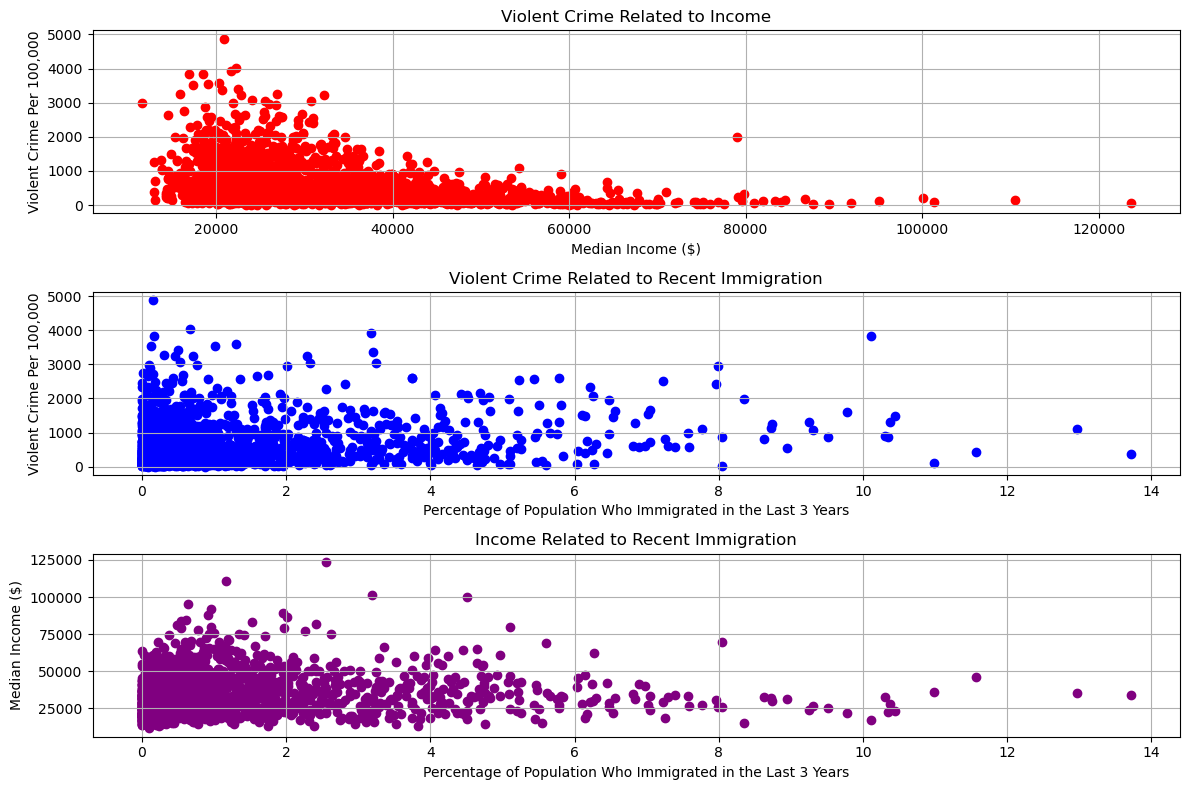

In [4]:
#scatter plots
#setting variables
x = df['medIncome']
z = df['PctRecentImmig']
y = df['ViolentCrimesPerPop']

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8))

#first plot
ax1.scatter(x, y, color='red')
ax1.set_title("Violent Crime Related to Income")
ax1.set_ylabel("Violent Crime Per 100,000")
ax1.set_xlabel("Median Income ($)")
ax1.grid(True)

#second plot
ax2.scatter(z,y, color='blue')
ax2.set_title("Violent Crime Related to Recent Immigration")
ax2.set_ylabel("Violent Crime Per 100,000")
ax2.set_xlabel("Percentage of Population Who Immigrated in the Last 3 Years")
fig.tight_layout()
ax2.grid(True)

#third plot
ax3.scatter(z,x, color='Purple')
ax3.set_title("Income Related to Recent Immigration")
ax3.set_ylabel("Median Income ($)")
ax3.set_xlabel("Percentage of Population Who Immigrated in the Last 3 Years")
fig.tight_layout()
ax3.grid(True)


In [5]:
res1 = stats.pearsonr(x, y)
print("1) Pearson's R value:" + str(res1)[36:46])
res2 = stats.pearsonr(z, y)
print("2) Pearson's R value: " + str(res2)[36:45])
res3 = stats.pearsonr(z, x)
print("3) Pearson's R value: " + str(res3)[36:45])

1) Pearson's R value:15587437, 
2) Pearson's R value: 06885696,
3) Pearson's R value: 54451065,


## 2
### Scatter Plot Relating Violent Crime to Urban Population
After removing the majority of data points at 0% and 100%, we can see a strong correlation between pctUrban and violentCrimePerPop. Urban areas are known for having more violent crime, and our graph backs that claim up. We also see they have more violent crime per person, meaning the increase in crime is disproportionate to the increase of the population in urban areas. 

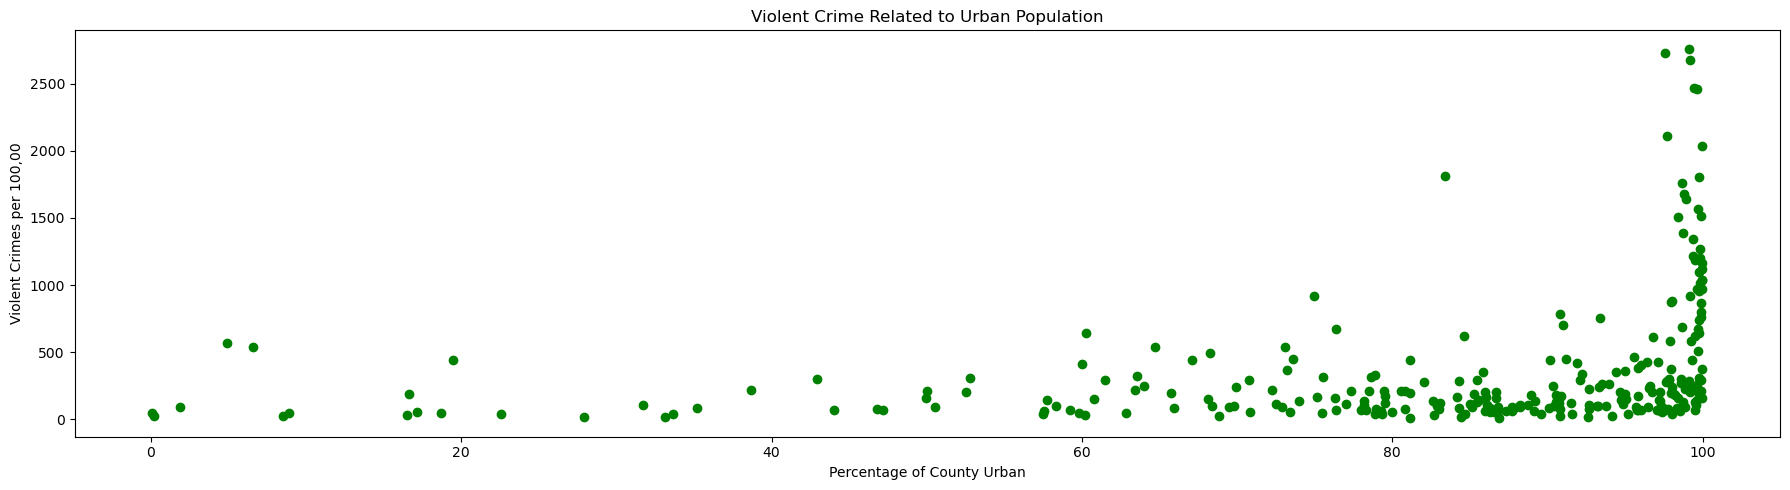

In [6]:
#scatter of violent crimes based on urbanity
#filtering out 0 and 100 values to reduce flaws in the dataset and outliers
a = df[df['pctUrban'] > 0]
b = a[a['pctUrban'] < 100]
b.head()

fig, axs = plt.subplots(figsize=(18, 5))
axs.set_ylabel('Violent Crimes per 100,00')
axs.set_xlabel('Percentage of County Urban')
axs.set_title('Violent Crime Related to Urban Population')
axs = plt.scatter(b['pctUrban'], b['ViolentCrimesPerPop'], color = 'green')
fig.tight_layout()

## 3
### Choropleth Map Depicting the Average Violent Crime Per Pop in Each State
This choropleth map depicts the 50 states, 45 of which have data. The data from all the counties in each state is compiled and averaged to find the mean amount of violent crime per 100,000 people in each state. The legend depicts roughly how much crime is represented by each color on the map. Coastal states tend to have more crime, possibly because they are more urban. 

In [7]:
#choropleth map
#taking avg violent crime of all the counties in each state
stateAvg = df.groupby('state', as_index=False)['ViolentCrimesPerPop'].mean()

fig = px.choropleth(
    stateAvg,
    locations='state',  
    locationmode='USA-states',  
    color='ViolentCrimesPerPop', 
    color_continuous_scale='bluered',  
    scope='usa', 
    title='Average Violent Crime Per 100,000 People by State'
)

fig.show()

## Conclusion
We see that income is negatively correlated with crime rate. Immigration rate does not have much correlation with violent crime. We also see that there is much more violent crime *per person* in urban areas as opposed to suburban or rural. 
From our choropleth map we can see which states have higher crime rates. It seems that the southeast has the most crime.